# Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

In [2]:
import pandas as pd

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-05-26,1.6439,1.9558,5.3878,1.4630,0.9707,7.5874,NaN,23.648,7.4489,...,4.9572,NaN,11.5280,1.4520,NaN,NaN,37.2630,21.5340,1.0751,21.0148
1,2023-05-25,1.6443,1.9558,5.3320,1.4599,0.9708,7.5891,NaN,23.645,7.4502,...,4.9495,NaN,11.5490,1.4515,NaN,NaN,37.1540,21.3944,1.0735,20.7466
2,2023-05-24,1.6402,1.9558,5.3397,1.4600,0.9732,7.6005,NaN,23.671,7.4477,...,4.9614,NaN,11.5103,1.4526,NaN,NaN,37.1710,21.4487,1.0785,20.7479
3,2023-05-23,1.6282,1.9558,5.3649,1.4571,0.9718,7.6039,NaN,23.681,7.4475,...,4.9720,NaN,11.4494,1.4527,NaN,NaN,37.4350,21.3993,1.0779,20.7920
4,2023-05-22,1.6294,1.9558,5.4056,1.4618,0.9700,7.6067,NaN,23.676,7.4478,...,4.9737,NaN,11.3765,1.4554,NaN,NaN,37.2820,21.4629,1.0822,20.9137


In [3]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6306,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6307,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6308,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6309,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6310,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6311 non-null   object 
 1   [Australian dollar ]      6311 non-null   object 
 2   [Bulgarian lev ]          5909 non-null   object 
 3   [Brazilian real ]         6043 non-null   object 
 4   [Canadian dollar ]        6311 non-null   object 
 5   [Swiss franc ]            6311 non-null   object 
 6   [Chinese yuan renminbi ]  6043 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6311 non-null   object 
 9   [Danish krone ]           6311 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6311 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6311 non-null   object 
 14  [Croatia

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()


,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [6]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.4030     1
1.4113     1
1.4106     1
1.4127     1
1.0751     1
Name: US_dollar, Length: 3734, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6249 non-null   datetime64[ns]
 1   US_dollar  6249 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.5 KB


# Rolling Mean

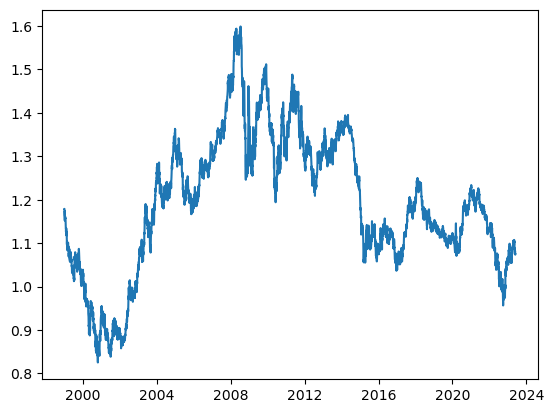

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

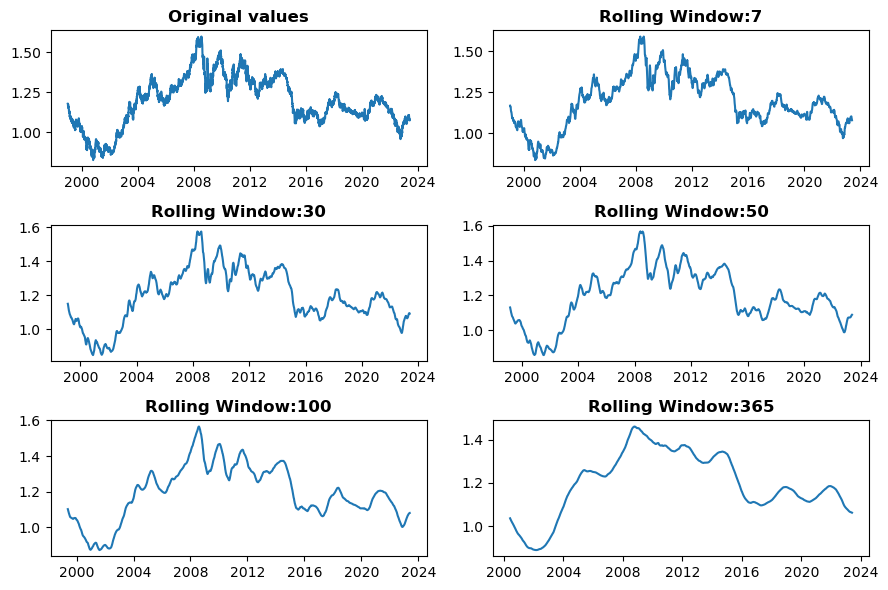

In [9]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

In [10]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6306,2023-05-22,1.0822,1.095337
6307,2023-05-23,1.0779,1.094883
6308,2023-05-24,1.0785,1.094483
6309,2023-05-25,1.0735,1.093860


# Coming Up With an Idea
Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.
# Storytelling Data Visualization Examples
## Financial Crisis Example

In [11]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

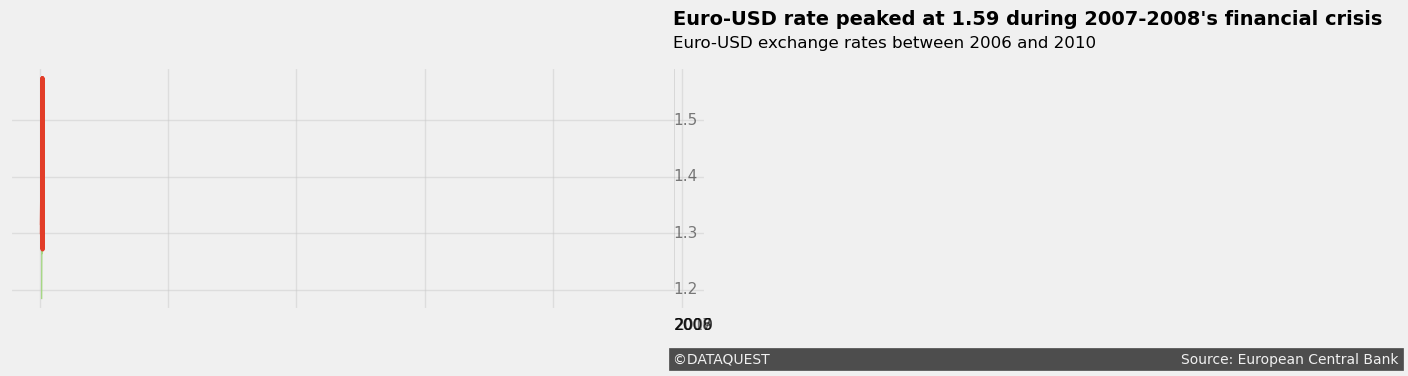

In [12]:
### Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

## The Three US Presidencies Example

In [13]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

Below, you'll notice we used matplotlib's functional approach to build the graphs. We use this approach because it offers more flexibility in arranging the subplots:

- We first build three of the graphs on a 2-by-3 grid (this grid should have six subplots, but we only build three; the bottom row remains empty).
We then build only the bottom graph of a 2-by-1 grid (this grid should have two subplots; the top row remains empty).
The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.